In [25]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))
!pip install  scikit-learn
# Any results you write to the current directory are saved as output.

1000_left.jpeg
1000_right.jpeg
1002_left.jpeg
1002_right.jpeg
1008_left.jpeg
1008_right.jpeg
100_left.jpeg
100_right.jpeg
1011_left.jpeg
1011_right.jpeg
1012_left.jpeg
1012_right.jpeg
1017_left.jpeg
1017_right.jpeg
1020_left.jpeg
1020_right.jpeg
1021_left.jpeg
1021_right.jpeg
1024_left.jpeg
1024_right.jpeg
1027_left.jpeg
1027_right.jpeg
1029_left.jpeg
1029_right.jpeg
102_left.jpeg
102_right.jpeg
1030_left.jpeg
1030_right.jpeg
1032_left.jpeg
1032_right.jpeg
1034_left.jpeg
1034_right.jpeg
1035_left.jpeg
1035_right.jpeg
1036_left.jpeg
1036_right.jpeg
1037_left.jpeg
1037_right.jpeg
1040_left.jpeg
1040_right.jpeg
1041_left.jpeg
1041_right.jpeg
1042_left.jpeg
1042_right.jpeg
1043_left.jpeg
1043_right.jpeg
1044_left.jpeg
1044_right.jpeg
1047_left.jpeg
1047_right.jpeg
1049_left.jpeg
1049_right.jpeg
104_left.jpeg
104_right.jpeg
1050_left.jpeg
1050_right.jpeg
1051_left.jpeg
1051_right.jpeg
1052_left.jpeg
1052_right.jpeg
1055_left.jpeg
1055_right.jpeg
1056_left.jpeg
1056_right.jpeg
1057_left.jpeg

You are using pip version 18.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [26]:
trainLabels = pd.read_csv("../input/trainLabels.csv")
trainLabels.head()

,image,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1


In [27]:
import os

listing = os.listdir("../input") 
listing.remove("trainLabels.csv")
np.size(listing)

1000

In [28]:
from PIL import Image

# input image dimensions
img_rows, img_cols = 200, 200

immatrix = []
imlabel = []

for file in listing:
    base = os.path.basename("../input/" + file)
    fileName = os.path.splitext(base)[0]
    imlabel.append(trainLabels.loc[trainLabels.image==fileName, 'level'].values[0])
    im = Image.open("../input/" + file)   
    img = im.resize((img_rows,img_cols))
    gray = img.convert('L')
    immatrix.append(np.array(gray).flatten())
    

In [29]:
immatrix = np.asarray(immatrix)
imlabel = np.asarray(imlabel)

In [30]:
from sklearn.utils import shuffle

data,Label = shuffle(immatrix,imlabel, random_state=2)
train_data = [data,Label]
type(train_data)

list

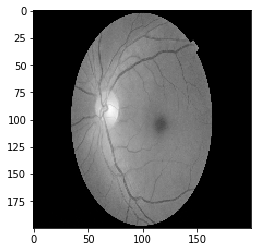

In [31]:
import matplotlib.pyplot as plt
import matplotlib

img=immatrix[167].reshape(img_rows,img_cols)
plt.imshow(img)
plt.imshow(img,cmap='gray')

In [32]:
#batch_size to train
batch_size = 32
# number of output classes
nb_classes = 5
# number of epochs to train
nb_epoch = 5

In [33]:
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 3

In [34]:
(X, y) = (train_data[0],train_data[1])
from sklearn.model_selection import train_test_split

# STEP 1: split X and y into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

print(X_train.shape)
print(X_test.shape)

#X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
#X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)

X_train = X_train.reshape(X_train.shape[0], img_cols, img_rows, 1)
X_test = X_test.reshape(X_test.shape[0], img_cols, img_rows, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

(800, 40000)
(200, 40000)
X_train shape: (800, 200, 200, 1)
800 train samples
200 test samples


label :  [1. 0. 0. 0. 0.]


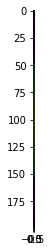

In [35]:
from keras.utils import np_utils

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

i = 100
plt.imshow(X_train[i, 0], interpolation='nearest')
print("label : ", Y_train[i,:])

In [42]:
#KERAS
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam

model = Sequential()

model.add(Convolution2D(nb_filters, nb_conv, nb_conv,
                        border_mode='valid',
                        input_shape=(img_cols, img_rows, 1)))
convout1 = Activation('relu')
model.add(convout1)
model.add(Convolution2D(nb_filters, nb_conv, nb_conv))
convout2 = Activation('relu')
model.add(convout2)
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adadelta')#KERAS
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam

model = Sequential()

model.add(Convolution2D(nb_filters, nb_conv, nb_conv,
                        border_mode='valid',
                        input_shape=(img_cols, img_rows, 1)))
convout1 = Activation('relu')
model.add(convout1)
model.add(Convolution2D(nb_filters, nb_conv, nb_conv))
convout2 = Activation('relu')
model.add(convout2)
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adadelta',metrics=['mae', 'acc'])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(200, 200,..., padding="valid")`
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:36: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(200, 200,..., padding="valid")`
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:39: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`


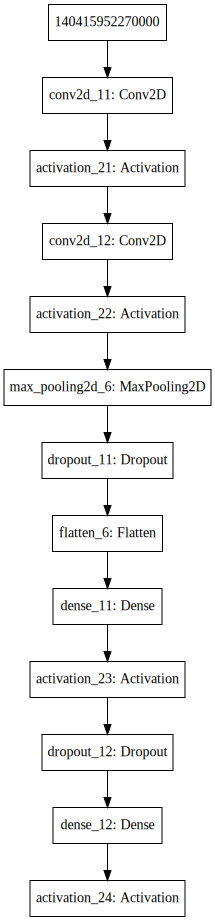

In [43]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [44]:
from keras.preprocessing.image import ImageDataGenerator

# create generators  - training data will be augmented images
validationdatagenerator = ImageDataGenerator()
traindatagenerator = ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,rotation_range=15,zoom_range=0.1 )

batchsize=8
train_generator=traindatagenerator.flow(X_train, Y_train, batch_size=batchsize) 
validation_generator=validationdatagenerator.flow(X_test, Y_test,batch_size=batchsize)


In [45]:
#hist = model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

model.fit_generator(train_generator, steps_per_epoch=int(len(X_train)/batchsize), epochs=3, validation_data=validation_generator, validation_steps=int(len(X_test)/batchsize), verbose=2)

#hist = model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch,
#              show_accuracy=True, verbose=1, validation_split=0.2)

Epoch 1/3
 - 115s - loss: 1.1107 - mean_absolute_error: 0.1892 - acc: 0.7325 - val_loss: 1.1724 - val_mean_absolute_error: 0.2678 - val_acc: 0.7500
Epoch 2/3
 - 113s - loss: 0.9539 - mean_absolute_error: 0.1869 - acc: 0.7350 - val_loss: 0.9327 - val_mean_absolute_error: 0.1699 - val_acc: 0.7500
Epoch 3/3
 - 113s - loss: 0.9328 - mean_absolute_error: 0.1812 - acc: 0.7362 - val_loss: 0.9014 - val_mean_absolute_error: 0.1620 - val_acc: 0.7500


In [46]:
score = model.evaluate(X_test, Y_test, verbose=1)
print(score)

200/200 [==============================] - 6s 29ms/step
[0.9013618469238281, 0.16203091740608216, 0.75]


In [47]:
print(model.metrics_names)

['loss', 'mean_absolute_error', 'acc']
